# Bayesian Optimization for estimating Noise in the Objective function

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from GPyOpt.methods import BayesianOptimization

In [101]:
def f(x):
    return x**2 + np.random.normal(0.0, 0.1)

### Test the objective function

In [102]:
x = np.random.choice(np.linspace(-10, 10, 100), 200)
y = [f(i) for i in x]

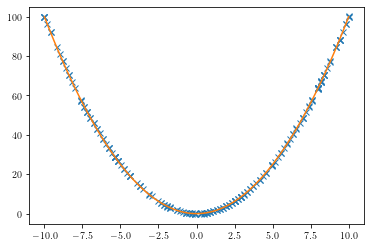

In [103]:
plt.plot(x, y, 'x')
plt.plot(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)**2)

Objective function looks about right.

In [104]:
# Define gpopt
domain = [{"name": "var_1", "type": "continuous", "domain": (-10.0, 10.0)}]

myBopt = BayesianOptimization(
    f=f,
    domain=domain,
    model_type="GP",
    acquisition_type="EI",
    acquisition_weight=1,
    initial_design_numdata=1,
)

In [105]:
log = myBopt.run_optimization(path_to_save='./', max_iter=100, save_inter_models=False)

In [106]:
myBopt.x_opt

array([0.00641158])

In [107]:
def plot_acquisition(axis, model):
    bounds = model.acquisition.space.get_bounds()

    x_grid = np.arange(bounds[0][0], bounds[0][1], 0.001)
    x_grid = x_grid.reshape(len(x_grid), 1)
    # acqu = model.acquisition.acquisition_function(x_grid)
    # acqu_normalized = (-acqu - min(-acqu)) / (max(-acqu - min(-acqu)))
    m, v = model.model.predict(x_grid)
    factor = max(m + 1.96 * np.sqrt(v)) - min(m - 1.96 * np.sqrt(v))
    axis.plot(x_grid, m, color="#D5313E", lw=2.0)
    axis.plot(x_grid, m - 1.96 * np.sqrt(v), color="#445792")
    axis.plot(x_grid, m + 1.96 * np.sqrt(v), color="#445792")
    axis.fill_between(
        np.ravel(x_grid),
        np.ravel(m - 1.96 * np.sqrt(v)),
        np.ravel(m + 1.96 * np.sqrt(v)),
        color="#445792",
        alpha=0.5,
    )
    y = model.Y - model.Y.mean()
    y = y / model.Y.std()
    axis.scatter(model.X[:-1], y[:-1], color="#9F383E", marker="o")

    axis.set_xlabel("Valve Setting")
    axis.set_ylabel("Objective")
    axis.set_ylim(
        min(m - 1.96 * np.sqrt(v)) - 0.25 * factor,
        max(m + 1.96 * np.sqrt(v)) + 0.05 * factor,
    )

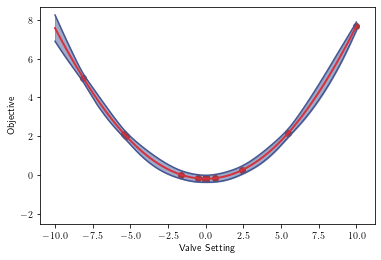

In [108]:
ax = plt.subplot(1, 1, 1)
plot_acquisition(ax, myBopt)

In [109]:
myBopt.model.get_model_parameters_names()

['GP_regression.Mat52.variance',
 'GP_regression.Mat52.lengthscale',
 'GP_regression.Gaussian_noise.variance']

In [110]:
myBopt.model.get_model_parameters()

array([[2.13035476e+04, 9.72611308e+01, 7.27380746e-05]])

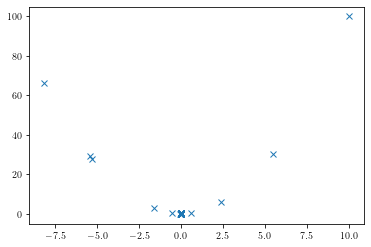

In [111]:
plt.plot(myBopt.X, myBopt.Y, 'x')

So, even though the uncertanity being estimated by the covariance matrix is not the same as the one in the objective function. We can argue that for a given sampling method and the number of samples, the estimate is accurate.